# Machine Learning Pipeline for Classification of Dataset

By: `Emmanuel Mande`


The goal here is to build a Machine Learning (ML) pipeline with algorithms to help me predict the 'CLASS' in the data sets "AMP_TrainSet.csv" and "Test.csv".

Useful Resources:

1. [Machine Learning Mastery](https://machinelearningmastery.com/)
2. [Medium-Machine Learning](https://medium.com/topic/machine-learning)
3. [Towards Data Science](https://towardsdatascience.com/)
4. [Andreas Mueller-Introduction to ML with Python](https://github.com/amueller/introduction_to_ml_with_python)
5. [Free Code Camp- Machine Learning](https://www.freecodecamp.org/news/tag/machine-learning/)
6. [nkmk note](https://note.nkmk.me/en/)

### Importing ML libraries.
"Libraries are sets of routines and functions that are written in a given language. A robust set of libraries can make it easier for developers to perform complex tasks without rewriting many lines of code." -[Shubhi Asthana](https://www.freecodecamp.org/news/essential-libraries-for-machine-learning-in-python-82a9ada57aeb/)

Much as ML has numerous libraries at our disposal for use, the ones am going to use in this pipeline include;
1. [Numpy](https://numpy.org/)(Numerical Python) - a library consisting of multidimensional array objects and a collection of routines for processing those arrays. It's ideal for scientific computations.
2. [Pandas](https://pandas.pydata.org/) - Offers data structures and operations for manipulating, analysis and cleaning dataframes and series. This will be handy because the data am going to work with is tabular.
3. [Matplotlib](https://matplotlib.org/) - It is a standard Python library used by every data scientist for creating 2D plots and graphs. It's thus ideal for data visualization.
4. [Seaborn](https://seaborn.pydata.org/tutorial.html)- It's a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
5. [Scikit-learn](https://scikit-learn.org/stable/index.html) - It's one the most popular ML libraries. It's built on two basic libraries of Python, NumPy and SciPy. It adds a set of algorithms for common machine learning and data mining tasks, including clustering, regression and classification.

To import these libraries into my environment, am going to use python's `import` statement.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#more libraries from the sklearn will be imported along the way.

## Reading and Taking a 'Snaek-Peek' at the Data

Here, am going to take a close look at the data, in order to have a clue on which algorithms i can use.

In [60]:
ls

ace-class-assignment.zip  Emmanuel_Mande.ML_Pipeline.ipynb
AMP_TrainSet.csv          Test.csv


In [61]:
df = pd.read_csv('AMP_TrainSet.csv')
print(df.head(3))
print(df.tail(3))

   FULL_Charge  FULL_AcidicMolPerc  FULL_AURR980107  FULL_DAYM780201  \
0          5.0               0.000            0.951           74.842   
1          4.0               5.405            0.931           71.595   
2          5.5               5.405            0.873           73.595   

   FULL_GEOR030101  FULL_OOBM850104  NT_EFC195  AS_MeanAmphiMoment  \
0            0.975           -3.663          0               0.282   
1            0.957           -4.011          1               0.600   
2            0.961           -2.512          0               0.593   

   AS_DAYM780201  AS_FUKS010112  CT_RACS820104  CLASS  
0         73.444          5.661          1.041      1  
1         68.222          6.537          1.453      1  
2         69.444          4.934          1.722      1  
      FULL_Charge  FULL_AcidicMolPerc  FULL_AURR980107  FULL_DAYM780201  \
3035         -1.5              12.500            1.091           76.542   
3036          2.0               5.000            0.849  

In [62]:
#I need to look at the number of rows and columns in my data
print(df.shape) #This will print rows and columns as a tuple (number of rows, number of columns)
print(df.shape[0]) #only the number of rows
print(df.shape[1]) #print only the number of columns

(3038, 12)
3038
12


In [63]:
#I need to know more about this data, so am going to use 'info' to get a collective information on the data including data types missing data etc
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3038 entries, 0 to 3037
Data columns (total 12 columns):
FULL_Charge           3038 non-null float64
FULL_AcidicMolPerc    3038 non-null float64
FULL_AURR980107       3038 non-null float64
FULL_DAYM780201       3038 non-null float64
FULL_GEOR030101       3038 non-null float64
FULL_OOBM850104       3038 non-null float64
NT_EFC195             3038 non-null int64
AS_MeanAmphiMoment    3038 non-null float64
AS_DAYM780201         3038 non-null float64
AS_FUKS010112         3038 non-null float64
CT_RACS820104         3038 non-null float64
CLASS                 3038 non-null int64
dtypes: float64(10), int64(2)
memory usage: 284.9 KB
None


In [64]:
print(df.isnull().sum()) #print a summary of the missing values in the data

FULL_Charge           0
FULL_AcidicMolPerc    0
FULL_AURR980107       0
FULL_DAYM780201       0
FULL_GEOR030101       0
FULL_OOBM850104       0
NT_EFC195             0
AS_MeanAmphiMoment    0
AS_DAYM780201         0
AS_FUKS010112         0
CT_RACS820104         0
CLASS                 0
dtype: int64


In [65]:
# Now i can dive deeper into the data by obtaining some mathematical summaries like mean, SD, max median and Min values,  etc.
#There I can know exactly how my data is spread and shaped.
print(df.describe())

       FULL_Charge  FULL_AcidicMolPerc  FULL_AURR980107  FULL_DAYM780201  \
count  3038.000000         3038.000000      3038.000000      3038.000000   
mean      2.060237            8.521520         0.971410        73.668760   
std       3.819929            7.586652         0.107413         8.527489   
min     -16.000000            0.000000         0.684000        42.750000   
25%       0.000000            2.516000         0.895000        68.294000   
50%       2.000000            7.143000         0.963000        74.059500   
75%       4.000000           13.158000         1.041000        79.343750   
max      30.000000           46.667000         1.451000       101.682000   

       FULL_GEOR030101  FULL_OOBM850104    NT_EFC195  AS_MeanAmphiMoment  \
count      3038.000000      3038.000000  3038.000000         3038.000000   
mean          0.994007        -2.432927     0.088545           15.683233   
std           0.031333         1.707223     0.284133           11.575665   
min        

CLASS
0    1519
1    1519
dtype: int64


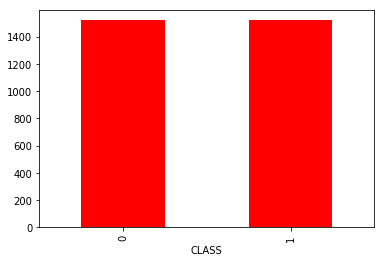

In [66]:
#Now, I need to look at how balanced or distributed my CLASS values are.
cd = df.groupby('CLASS').size()
print(cd)
cd.plot(kind='bar',color='red')

### Correletions Between Attributes

Correlation is a measure of how variables within a dataset can be related. This usually happens for lots of reasons.
For example:

    One variable could cause or depend on the values of another variable.
    One variable could be lightly associated with another variable.
    Two variables could depend on a third unknown variable.

It can be useful in data analysis and modeling to better understand the statistical relationships between variables. A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neural or zero, meaning that the variables are unrelated.

In [67]:
cor = df.corr() #Using the corr function in pandas, I can get the pearson's correlation.
print(cor)

                    FULL_Charge  FULL_AcidicMolPerc  FULL_AURR980107  \
FULL_Charge            1.000000           -0.612996        -0.490977   
FULL_AcidicMolPerc    -0.612996            1.000000         0.794796   
FULL_AURR980107       -0.490977            0.794796         1.000000   
FULL_DAYM780201       -0.434603            0.541481         0.548253   
FULL_GEOR030101       -0.058725            0.115201         0.346139   
FULL_OOBM850104       -0.283758            0.513344         0.462712   
NT_EFC195              0.088068           -0.143168        -0.169540   
AS_MeanAmphiMoment     0.355477           -0.431590        -0.426097   
AS_DAYM780201         -0.365374            0.449621         0.456260   
AS_FUKS010112         -0.090570            0.002334         0.032958   
CT_RACS820104          0.232929           -0.213543        -0.403599   
CLASS                  0.534602           -0.598816        -0.584111   

                    FULL_DAYM780201  FULL_GEOR030101  FULL_OOBM

In [68]:
#I can also chose to select out the correlation in regards to the CLASS.
#I'll need to do this by indexing the 'CLASS' in the correlated data.
cor['CLASS']

FULL_Charge           0.534602
FULL_AcidicMolPerc   -0.598816
FULL_AURR980107      -0.584111
FULL_DAYM780201      -0.554838
FULL_GEOR030101      -0.260470
FULL_OOBM850104      -0.453287
NT_EFC195             0.260702
AS_MeanAmphiMoment    0.693552
AS_DAYM780201        -0.437168
AS_FUKS010112         0.033432
CT_RACS820104         0.267652
CLASS                 1.000000
Name: CLASS, dtype: float64

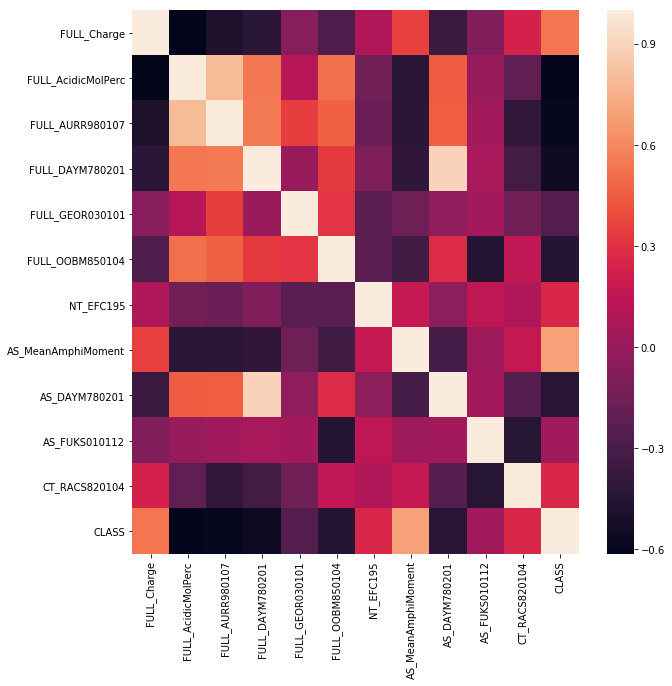

In [69]:
#In order to beautifully see the whole correlation, I can use Seaborn's heatmap.
plt.figure(figsize=(10,10))
sns.heatmap(cor)